<a href="https://colab.research.google.com/github/kriitiika10/EDA-Project/blob/main/22BDS0304.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("indian_food.csv")
df.head()

Saving indian_food.csv to indian_food (1).csv


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,Balu shahi,"Maida flour, yogurt, oil, sugar",vegetarian,45,25,sweet,dessert,West Bengal,East
1,Boondi,"Gram flour, ghee, sugar",vegetarian,80,30,sweet,dessert,Rajasthan,West
2,Gajar ka halwa,"Carrots, milk, sugar, ghee, cashews, raisins",vegetarian,15,60,sweet,dessert,Punjab,North
3,Ghevar,"Flour, ghee, kewra, milk, clarified butter, su...",vegetarian,15,30,sweet,dessert,Rajasthan,West
4,Gulab jamun,"Milk powder, plain flour, baking powder, ghee,...",vegetarian,15,40,sweet,dessert,West Bengal,East


In [ ]:
print("Shape of dataset:", df.shape)

Shape of dataset: (255, 9)


In [ ]:
# Summary for numerical columns
print(df.describe())

        prep_time   cook_time
count  255.000000  255.000000
mean    31.105882   34.529412
std     72.554409   48.265650
min     -1.000000   -1.000000
25%     10.000000   20.000000
50%     10.000000   30.000000
75%     20.000000   40.000000
max    500.000000  720.000000


In [ ]:
# Summary for categorical columns
print(df.describe(include='object'))

              name              ingredients        diet flavor_profile  \
count          255                      255         251            255   
unique         255                      252           2              5   
top     Balu shahi  Gram flour, ghee, sugar  vegetarian          spicy   
freq             1                        2         223            133   

             course    state region  
count           254      255    253  
unique            5       25      7  
top     main course  Gujarat   West  
freq            129       35     74  


In [ ]:
#check for any duplicate values
print(df.duplicated().sum())

0


#Data Handling

In [ ]:
#checking for null values
df.isnull()

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
250,False,False,False,False,False,False,False,False,False
251,False,False,False,False,False,False,False,False,False
252,False,False,False,False,False,False,False,False,False
253,False,False,False,False,False,False,False,False,False


In [ ]:
#number of null values per column
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,0


In [ ]:
#replace -1 and '?' with NaN
df.replace(-1, np.nan, inplace=True)
df.replace('-1', np.nan, inplace=True)
df.replace('?', np.nan, inplace=True)
df.isnull().sum()

,0
name,0
ingredients,0
diet,4
prep_time,30
cook_time,28
flavor_profile,29
course,2
state,24
region,15


In [ ]:
#forward fill method to handle missing values
df.ffill(inplace=True)
df.isnull().sum()

,0
name,0
ingredients,0
diet,0
prep_time,0
cook_time,0
flavor_profile,0
course,0
state,0
region,0


In [ ]:
#mean of numerical values
print("cook_time mean=",df['cook_time'].mean())
print("prep_time mean=",df['prep_time'].mean())

cook_time mean= 37.956862745098036
prep_time mean= 33.30980392156863


#Univariate Analysis

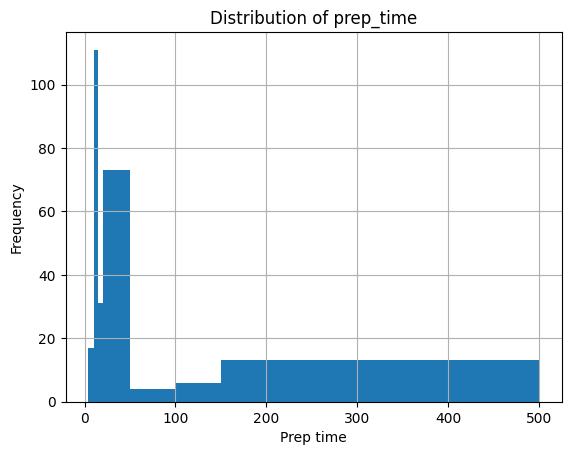

In [ ]:
bins = [4, 10, 15, 20, 50, 100, 150, 500]
df['prep_time'].hist(bins=bins)
plt.title("Distribution of prep_time")
plt.xlabel("Prep time")
plt.ylabel("Frequency")
plt.show()

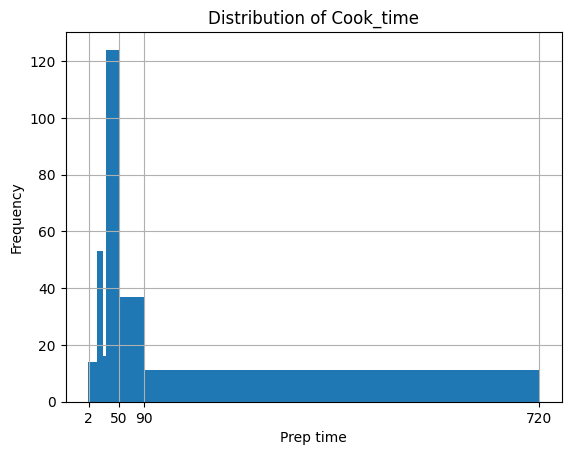

In [ ]:
bins2 = [1, 15, 25, 30, 50, 90, 720]
df['cook_time'].hist(bins=bins2)
plt.xticks([2, 50, 90, 720])
plt.title("Distribution of Cook_time")
plt.xlabel("Prep time")
plt.ylabel("Frequency")
plt.show()

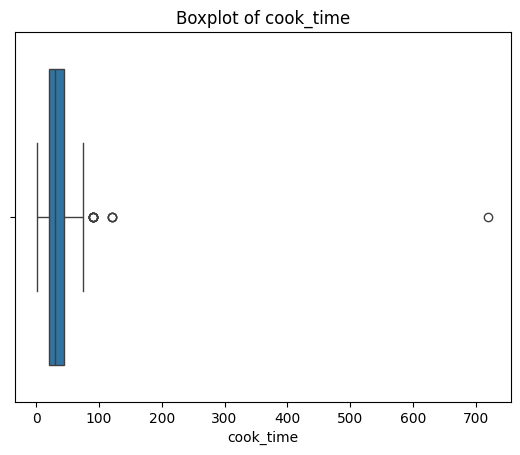

In [ ]:
sns.boxplot(x=df['cook_time'])
plt.title("Boxplot of cook_time")
plt.show()

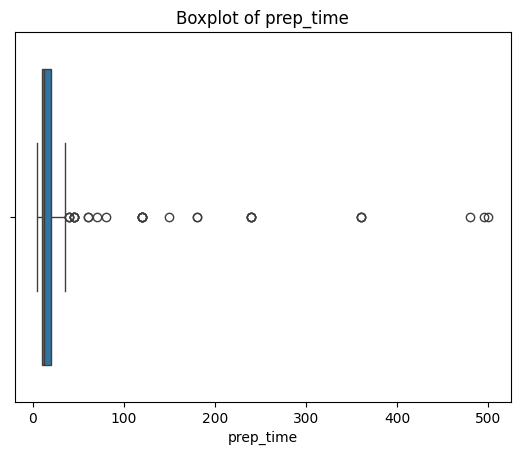

In [ ]:
sns.boxplot(x=df['prep_time'])
plt.title("Boxplot of prep_time")
plt.show()

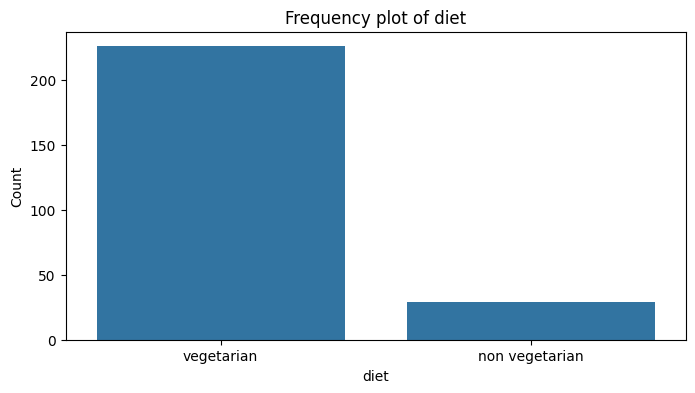

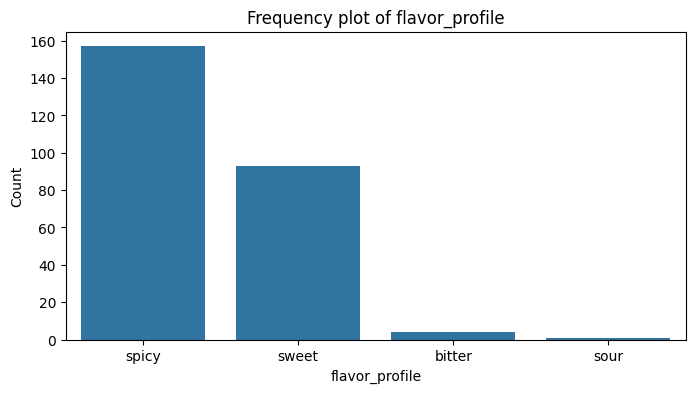

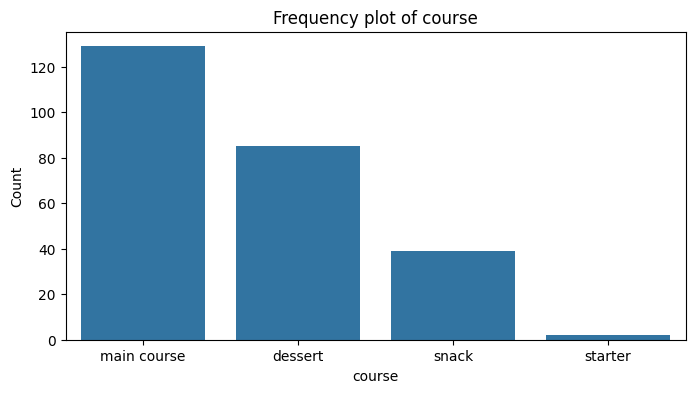

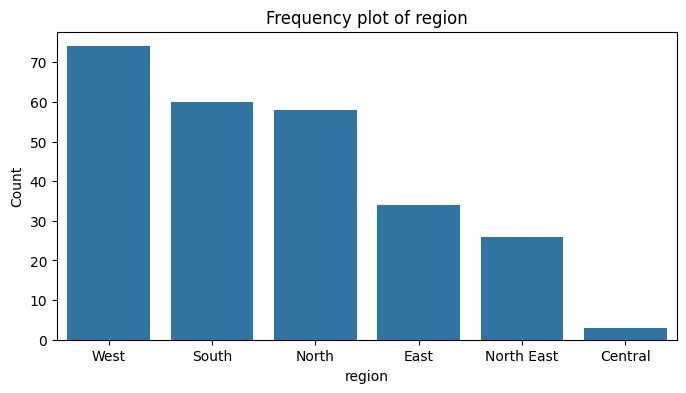

In [ ]:
#Frequency plots of all categorical columns
cat_cols = ['diet','flavor_profile','course','region']
for col in cat_cols:
    if col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=df, order=df[col].value_counts().index)
        plt.title(f'Frequency plot of {col}')
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()

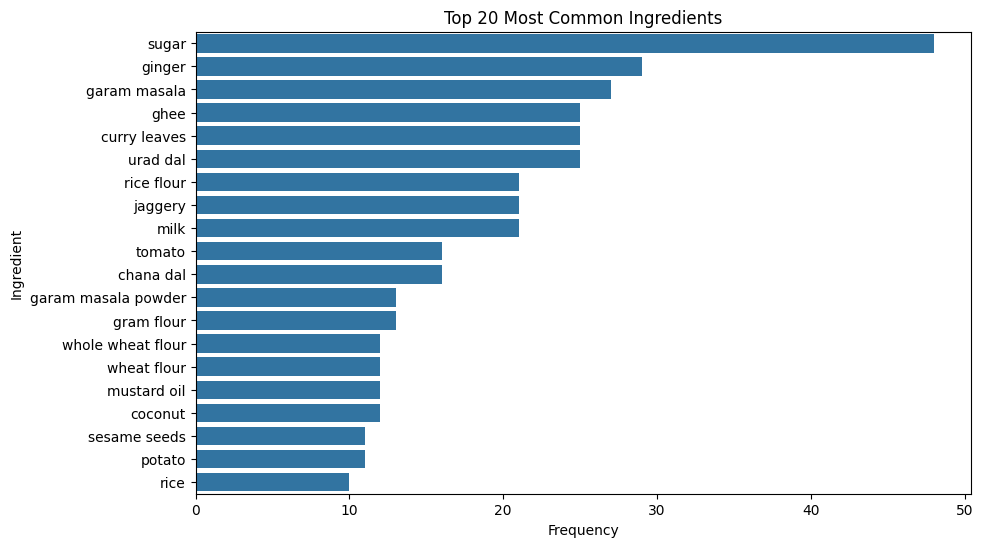

In [ ]:
#plotting the frequency of ingredients
all_ingredients = df['ingredients'].str.split(',\s*').explode()
all_ingredients = all_ingredients.str.strip().str.lower()
ingredient_counts = all_ingredients.value_counts()
top_n = 20
plt.figure(figsize=(10, 6))
sns.barplot(x=ingredient_counts.head(top_n).values,
            y=ingredient_counts.head(top_n).index)
plt.title(f"Top {top_n} Most Common Ingredients")
plt.xlabel("Frequency")
plt.ylabel("Ingredient")
plt.show()

#Bivariate Analysis

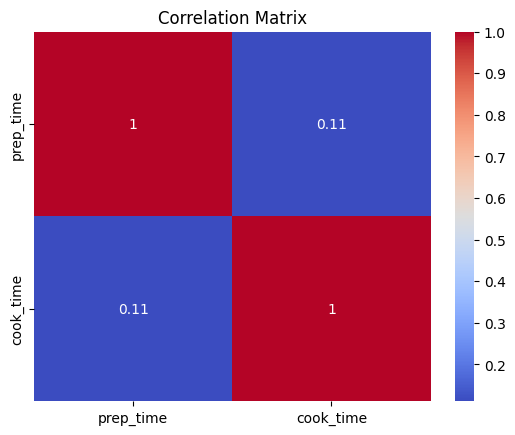

In [ ]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

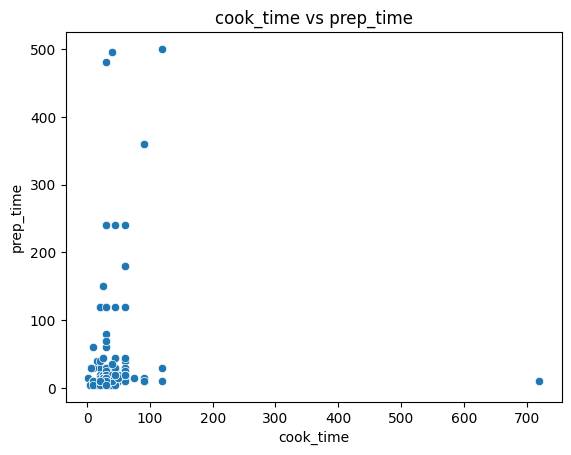

In [ ]:
sns.scatterplot(data=df, x='cook_time', y='prep_time')
plt.title("cook_time vs prep_time")
plt.show()

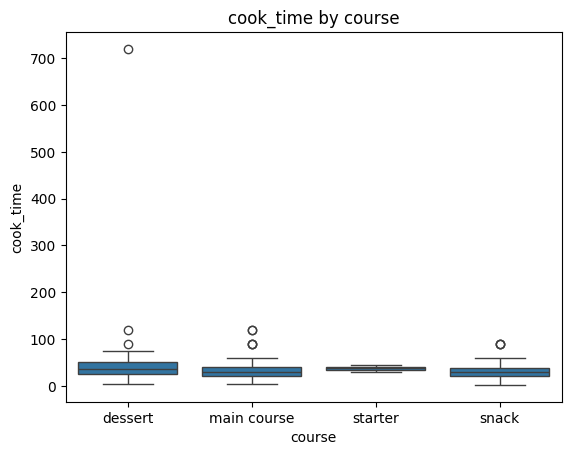

In [ ]:
sns.boxplot(x='course', y='cook_time', data=df)
plt.title("cook_time by course")
plt.show()

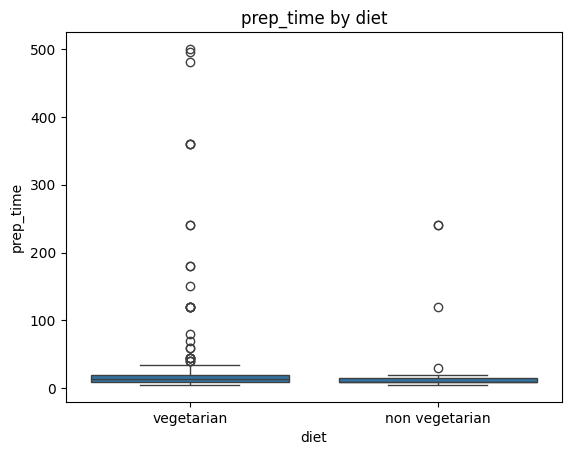

In [ ]:
sns.boxplot(x='diet', y='prep_time', data=df)
plt.title("prep_time by diet")
plt.show()

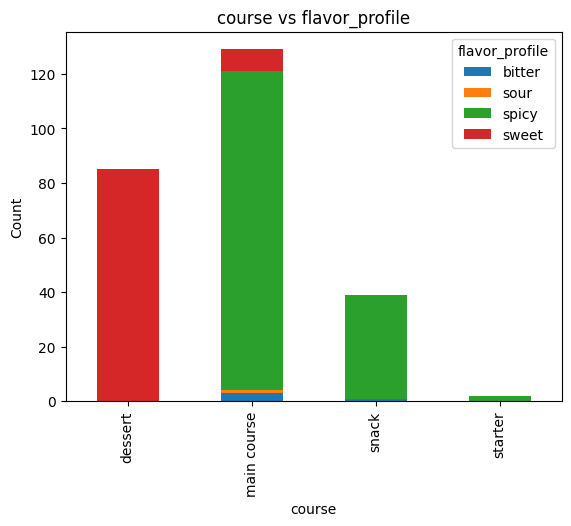

In [ ]:
ct = pd.crosstab(df['course'], df['flavor_profile'])
ct.plot(kind='bar', stacked=True)
plt.title("course vs flavor_profile")
plt.ylabel("Count")
plt.show()

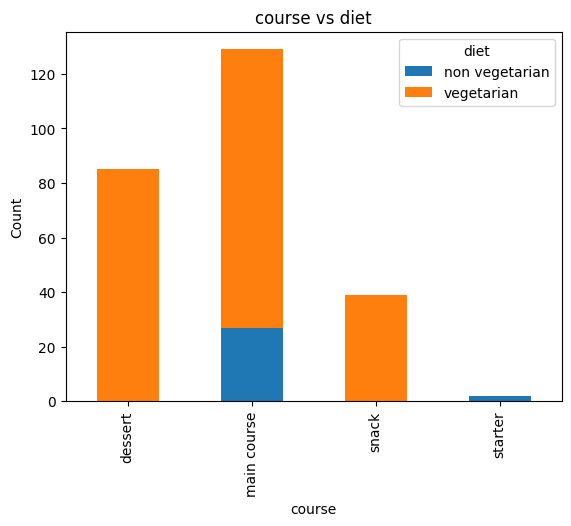

In [ ]:
ct = pd.crosstab(df['course'], df['diet'])
ct.plot(kind='bar', stacked=True)
plt.title("course vs diet")
plt.ylabel("Count")
plt.show()

# Multivariate Analysis

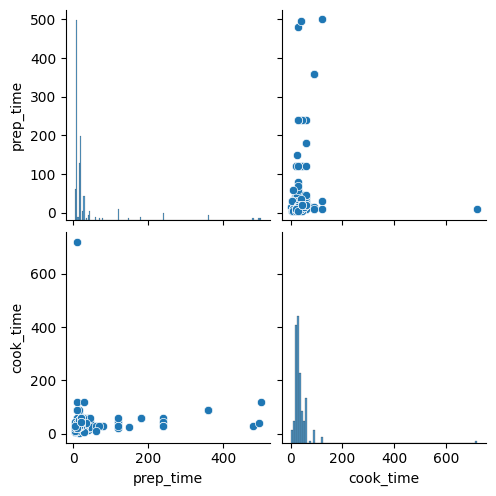

In [ ]:
sns.pairplot(df.select_dtypes(include='number'))
plt.show()